In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
from glob import glob
import nibabel as nib
from scipy import stats
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%pylab

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


### Step 1: Transform Mask from MNI space to run1 functional space

In [15]:
%%bash
cd /vols/Data/soma/superusers/ProControl
maskpath=/vols/Data/soma/superusers/ProControl/model/masks
mask=Rhemi_bin
mask_xform=Rhemi_run1

for subj in sub-ar04; do
    for sess in post; do
        echo $sess
        lev1_dir=/vols/Data/soma/superusers/ProControl/${subj}/$sess
        flirt -in ${maskpath}/${mask}.nii.gz -applyxfm -init ${lev1_dir}/model/glm/moveview/run1.feat/reg/standard2example_func.mat -out ${lev1_dir}/model/masks/${mask_xform}.nii.gz -interp nearestneighbour -ref ${lev1_dir}/func/${subj}_task_run-1_ref.nii.gz;
    done
done

post


### Step 1B: Moving a BOT mask to run1 func space

In [66]:
%%bash
cd /vols/Data/soma/superusers/ProControl
mask=cluster_mask_LOTC_diff_MNImask
mask_xform=OTC_BOT_n20
lev1_dir=/vols/Data/soma/superusers/ProControl/sub-ar01/pre
OG_dir=/vols/Data/soma/superusers/masks/thr3.1_n20_new/bilateral

for subj in sub-ar01; do
    flirt -in ${OG_dir}/${mask}.nii.gz -applyxfm -init ${lev1_dir}/model/glm/moveview/run1_v2.feat/reg/standard2example_func.mat -out ${lev1_dir}/model/masks/${mask_xform}.nii.gz -interp nearestneighbour -ref ${lev1_dir}/func/${subj}_task_run-1_ref.nii.gz;
done

In [19]:
%%bash
cd /vols/Data/soma/superusers/ProControl
mask=Rhemi_run1
mask_xform=Rhemi_inmidsp

for subj in sub-ar05; do
    lev1_dir=/vols/Data/soma/superusers/ProControl/${subj}/pre
    flirt -in ${lev1_dir}/model/masks/${mask}.nii.gz -applyxfm -init ${lev1_dir}/func/${subj}_task_run-1_ref_to_midsp.mat -out ${lev1_dir}/model/masks/${mask_xform}.nii.gz -interp nearestneighbour -ref ${lev1_dir}/func/Midtrans.nii.gz;
done

### Step 2: Transform Mask from run1 functional space to midspace

In [67]:
%%bash
cd /vols/Data/soma/superusers/ProControl
mask=OTC_BOT_n20
mask_xform=OTC_BOT_n20_visloc_inmidsp

for subj in sub-ar01; do
    for sess in pre post; do
        echo $sess
        lev1_dir=/vols/Data/soma/superusers/ProControl/${subj}/$sess
        flirt -in ${lev1_dir}/model/masks/${mask}.nii.gz -applyxfm -init ${lev1_dir}/func/${subj}_task_run-1_ref_to_midsp.mat -out ${lev1_dir}/model/masks/${mask_xform}.nii.gz -interp nearestneighbour -ref ${lev1_dir}/func/Midtrans.nii.gz;
    done
done

pre
post


## Identify the number of active voxels from a zstat within a mask

### Step 1: Transform mask to visloc space

In [122]:
%%bash
cd /vols/Data/soma/superusers/ProControl
mask=cluster_mask_LOTC_diff_MNImask
mask_xform=OTC_BOT_n20_visloc

for subj in sub-ar03; do
    for sess in pre; do
        echo $sess
        lev1_dir=/vols/Data/soma/superusers/ProControl/${subj}/$sess
        OG_dir=/vols/Data/soma/superusers/masks/thr3.1_n20_new/bilateral
        
        flirt -in ${OG_dir}/${mask}.nii.gz -applyxfm -init ${lev1_dir}/model/glm/vis/visloc.feat/reg/standard2example_func.mat -out ${lev1_dir}/model/masks/${mask_xform}.nii.gz -interp nearestneighbour -ref ${lev1_dir}/func/${subj}_task_hand-tool_localizer_ref.nii.gz;
    done
done

pre


### Step 2: Define subjects

In [123]:
sessions = ['pre']

### Step 3: Identify most active voxels in OTC

In [124]:
for sess in sessions:
    nii = nib.load('/vols/Data/soma/superusers/ProControl/sub-ar03/{sess}/model/glm/vis/visloc.feat/stats/zstat19.nii.gz'.format(sess=sess))
    mask = nib.load('/vols/Data/soma/superusers/ProControl/sub-ar03/{sess}/model/masks/OTC_BOT_n20_visloc.nii.gz'.format(sess=sess))
    maskdata = mask.get_data()
    zstat = nii.get_data()
    zstat[maskdata==0] = 0 
    zstat_list = zstat[zstat>0]
    zstat_list[::-1].sort()
    thr = zstat_list[200]
    mask = zstat > thr
    nib.save(nib.Nifti1Image(mask,nii.affine, header=nii.header),'/vols/Data/soma/superusers/ProControl/sub-ar03/{sess}/model/masks/OTC_top200/OTC_BOT_n20_visloc.nii.gz'.format(sess=sess))
    print('/vols/Data/soma/superusers/ProControl/sub-ar03/{sess}/model/masks/OTC_top200/OTC_BOT_n20_visloc.nii.gz'.format(sess=sess))

/vols/Data/soma/superusers/ProControl/sub-ar03/pre/model/masks/OTC_top200/OTC_BOT_n20_visloc.nii.gz


/home/fs0/hschone/anaconda3/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  after removing the cwd from sys.path.
/home/fs0/hschone/anaconda3/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  """


### Step 4: Transform Visloc Mask back to MNI space

In [141]:
%%bash
cd /vols/Data/soma/superusers/ProControl/
mask=OTC_BOT_n20_visloc
mask_xform=OTC_BOT_n20_visloc_MNI

for subj in sub-ar05; do
    for sess in post; do
        echo $sess
        flirt -in ${subj}/${sess}/model/masks/OTC_top200/${mask}.nii.gz -applyxfm -init ${subj}/${sess}/model/glm/visloc/visloc.feat/reg/example_func2standard.mat -out ${subj}/${sess}/model/masks/OTC_top200/${mask_xform}.nii.gz -interp nearestneighbour -ref /opt/fmrib/fsl/data/standard/MNI152_T1_2mm.nii.gz;
    done
done

post


### Step 5: Transform visloc mask in MNI space to functional run1 space

In [142]:
%%bash
cd /vols/Data/soma/superusers/ProControl
mask=OTC_BOT_n20_visloc_MNI
mask_xform=OTC_BOT_n20_visloc_run1

for subj in sub-ar05; do
    for sess in post; do
        echo $sess
        lev1_dir=/vols/Data/soma/superusers/ProControl/${subj}/$sess
        flirt -in ${lev1_dir}/model/masks/OTC_top200/${mask}.nii.gz -applyxfm -init ${lev1_dir}/model/glm/moveview/run1.feat/reg/standard2example_func.mat -out ${lev1_dir}/model/masks/OTC_top200/${mask_xform}.nii.gz -interp nearestneighbour -ref ${lev1_dir}/func/${subj}_task_run-1_ref.nii.gz;
    done
done

post


### Step 6: Transform visloc func run1 space mask to midspace

In [143]:
%%bash
cd /vols/Data/soma/superusers/ProControl
mask=OTC_BOT_n20_visloc_run1
mask_xform=OTC_BOT_n20_visloc_inmidsp

for subj in sub-ar05; do
    for sess in post; do
        echo $sess
        lev1_dir=/vols/Data/soma/superusers/ProControl/${subj}/$sess
        flirt -in ${lev1_dir}/model/masks/OTC_top200/${mask}.nii.gz -applyxfm -init ${lev1_dir}/func/${subj}_task_run-1_ref_to_midsp.mat -out ${lev1_dir}/model/masks/OTC_top200/${mask_xform}.nii.gz -interp nearestneighbour -ref ${lev1_dir}/func/Midtrans.nii.gz;
    done
done

post


### Step 7: Transform visloc func run1 to MNI -- to put on surface

In [146]:
%%bash
cd /vols/Data/soma/superusers/ProControl
mask=OTC_BOT_n20_visloc_run1
mask_xform=OTC_BOT_n20_visloc_top200_MNI

for subj in sub-ar01; do
    for sess in post; do
        echo $sess
        lev1_dir=/vols/Data/soma/superusers/ProControl/${subj}/$sess
        flirt -in ${lev1_dir}/model/masks/OTC_top200/${mask}.nii.gz -applyxfm -init ${subj}/${sess}/model/glm/moveview/run1_v2.feat/reg/example_func2standard.mat -out ${lev1_dir}/model/masks/OTC_top200/${mask_xform}.nii.gz -interp nearestneighbour -ref /opt/fmrib/fsl/data/standard/MNI152_T1_2mm.nii.gz;
    done
done

post


### Transforming MNI Masks from FIONA Hand-Tool Localiser to Visloc Run Subject Space

In [142]:
%%bash
cd /vols/Data/soma/superusers/ProControl
for subj in sub-??; do 
    flirt -in ../masks/thr3.1_n20_new/cluster_mask_L_IPS_diff_MNImask.nii.gz -applyxfm -init ${subj}/model/glm/visloc/visloc.feat/reg/standard2example_func.mat -out ${subj}/model/masks/parietal_BOT_n20_lhemi_subjspace.nii.gz -interp nearestneighbour -ref ${subj}/func/${subj}_task-visloc_bold_ref.nii.gz ;
    echo $subj
done

sub-co01
sub-co02
sub-co03
sub-co04
sub-co05
sub-co07
sub-co09
sub-co10
sub-co11
sub-co13
sub-co14
sub-co15
sub-lp01
sub-lp02
sub-lp03
sub-lp04
sub-lp05
sub-lp06
sub-lp07


In [71]:
%%bash
cd /vols/Data/soma/superusers/
for subj in sub-lp{01..07}; do 
    flirt -in masks/IPS_thr30_mask_L.nii.gz -applyxfm -init ${subj}/model/glm/visloc/visloc.feat/reg/standard2example_func.mat -out ${subj}/model/masks/IPS_L_subjspace.nii.gz -interp nearestneighbour -ref ${subj}/func/${subj}_task-visloc_bold_ref.nii.gz ;
    flirt -in masks/IPS_thr30_mask_R.nii.gz -applyxfm -init ${subj}/model/glm/visloc/visloc.feat/reg/standard2example_func.mat -out ${subj}/model/masks/IPS_R_subjspace.nii.gz -interp nearestneighbour -ref ${subj}/func/${subj}_task-visloc_bold_ref.nii.gz ;
    echo $subj
done

sub-lp01
sub-lp02
sub-lp03
sub-lp04
sub-lp05
sub-lp06
sub-lp07


#### Flirt the IPS mask to midsp

In [131]:
%%bash
cd /vols/Data/soma/superusers/
for subj in sub-????; do 
    flirt -in masks/tools_neurosynth/parietal_thr50_tools_neurosynth_left.nii.gz -applyxfm -init ${subj}/model/glm/pros_videos/run1_nocatch.feat/reg/standard2example_func.mat -out ${subj}/model/masks/V1_full_subjspace.nii.gz -interp nearestneighbour -ref ${subj}/func/${subj}_task-video_run-1_bold_ref.nii.gz ;
    #flirt -in masks/IPS_thr30_mask_R.nii.gz -applyxfm -init ${subj}/model/glm/pros_videos/run1_nocatch.feat/reg/standard2example_func.mat -out ${subj}/model/masks/IPS_R_subjspace.nii.gz -interp nearestneighbour -ref ${subj}/func/${subj}_task-video_run-1_bold_ref.nii.gz ;
    echo $subj
done

sub-lp01
sub-lp02
sub-lp03
sub-lp04
sub-lp05
sub-lp06
sub-lp07


In [136]:
%%bash
cd /vols/Data/soma/superusers/
for subj in sub-lp{01..07}; do 
    flirt -in ${subj}/model/masks/V1_full_subjspace.nii.gz -applyxfm -init ${subj}/func/${subj}_task-video_run-1_bold_ref_to_midsp.mat -out ${subj}/model/masks/V1_all_inmidsp.nii.gz -interp nearestneighbour -ref ${subj}/func/Midtrans.nii.gz ;
    #flirt -in ${subj}/model/masks/IPS_R_subjspace.nii.gz -applyxfm -init ${subj}/func/${subj}_task-video_run-1_bold_ref_to_midsp.mat -out ${subj}/model/masks/IPS_R_inmidsp.nii.gz -interp nearestneighbour -ref ${subj}/func/Midtrans.nii.gz ;
    echo $subj
done

sub-lp01
sub-lp02
sub-lp03
sub-lp04
sub-lp05
sub-lp06
sub-lp07


In [82]:
%%bash
cd /vols/Data/soma/superusers/
for subj in sub-co07; do 
    fslmaths ${subj}/model/masks/IPS_L_subjspace.nii.gz -add ${subj}/model/masks/IPS_R_subjspace.nii.gz ${subj}/model/masks/IPS_bi_subjspace.nii.gz;
    echo $subj
done

sub-co07


In [4]:
%%bash
cd /vols/Data/soma/superusers/
for subj in sub-co{01..15}; do 
    fslmaths ${subj}/model/masks/top200hemi/IPS_L_BOT_inmidsp.nii.gz -add ${subj}/model/masks/top100hemi/PM_L_BOT_inmidsp.nii.gz ${subj}/model/masks/premotor-parietal_L_BOT_300voxels.nii.gz;
    fslmaths ${subj}/model/masks/top200hemi/IPS_R_BOT_inmidsp.nii.gz -add ${subj}/model/masks/top100hemi/PM_R_BOT_inmidsp.nii.gz ${subj}/model/masks/premotor-parietal_R_BOT_300voxels.nii.gz;
    echo $subj
done

sub-co01
sub-co02
sub-co03
sub-co04
sub-co05
sub-co06
sub-co07
sub-co08
sub-co09
sub-co10
sub-co11
sub-co12
sub-co13
sub-co14
sub-co15


Image Exception : #63 :: No image files match: sub-co06/model/masks/top200hemi/IPS_L_BOT_inmidsp
terminate called after throwing an instance of 'std::runtime_error'
  what():  No image files match: sub-co06/model/masks/top200hemi/IPS_L_BOT_inmidsp
bash: line 2: 18854 Aborted                 (core dumped) fslmaths ${subj}/model/masks/top200hemi/IPS_L_BOT_inmidsp.nii.gz -add ${subj}/model/masks/top100hemi/PM_L_BOT_inmidsp.nii.gz ${subj}/model/masks/premotor-parietal_L_BOT_300voxels.nii.gz
Image Exception : #63 :: No image files match: sub-co06/model/masks/top200hemi/IPS_R_BOT_inmidsp
terminate called after throwing an instance of 'std::runtime_error'
  what():  No image files match: sub-co06/model/masks/top200hemi/IPS_R_BOT_inmidsp
bash: line 2: 18859 Aborted                 (core dumped) fslmaths ${subj}/model/masks/top200hemi/IPS_R_BOT_inmidsp.nii.gz -add ${subj}/model/masks/top100hemi/PM_R_BOT_inmidsp.nii.gz ${subj}/model/masks/premotor-parietal_R_BOT_300voxels.nii.gz
Image Exception 

In [130]:
#Define Subjects (exlcuding sub-co12, sub-co06, sub-co08)
subjects = ('sub-lp01','sub-lp02','sub-lp03','sub-lp04','sub-lp05','sub-lp06','sub-lp07','sub-co01','sub-co02','sub-co03','sub-co04','sub-co05','sub-co07','sub-co09','sub-co10','sub-co11','sub-co13','sub-co14','sub-co15')

In [143]:
# Run on each OTC mask separately 
masks = ['parietal_BOT_n20_lhemi','parietal_BOT_n20_lhemi']
for subj in subjects:
    print(subj)
    bilateral = None
    for mfilename in masks:
        nii = nib.load('/vols/Data/soma/superusers/{subj}/model/glm/visloc/visloc.feat/stats/zstat19.nii.gz'.format(subj=subj))
        mask = nib.load('/vols/Data/soma/superusers/{subj}/model/masks/{mname}_subjspace.nii.gz'.format(subj=subj,mname=mfilename))
        maskdata = mask.get_data()
        zstat = nii.get_data()
        zstat[maskdata==0] = 0 
        zstat_list = zstat[zstat>0]
        zstat_list[::-1].sort()
        thr = zstat_list[200]
        mask = zstat > thr
        nib.save(nib.Nifti1Image(mask,nii.affine, header=nii.header),'/vols/Data/soma/superusers/{subj}/model/masks/top200hemi/{mname}_subjspace.nii.gz'.format(subj=subj,mname=mfilename))
        print('/vols/Data/soma/superusers/{subj}/model/masks/top200hemi/{mname}_subjspace.nii.gz'.format(subj=subj,mname=mfilename))

sub-lp01
/vols/Data/soma/superusers/sub-lp01/model/masks/top200hemi/parietal_BOT_n20_lhemi_subjspace.nii.gz
/vols/Data/soma/superusers/sub-lp01/model/masks/top200hemi/parietal_BOT_n20_lhemi_subjspace.nii.gz
sub-lp02
/vols/Data/soma/superusers/sub-lp02/model/masks/top200hemi/parietal_BOT_n20_lhemi_subjspace.nii.gz


/home/fs0/hschone/anaconda3/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  if __name__ == '__main__':
/home/fs0/hschone/anaconda3/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  # Remove the CWD from sys.path while we load stuff.


/vols/Data/soma/superusers/sub-lp02/model/masks/top200hemi/parietal_BOT_n20_lhemi_subjspace.nii.gz
sub-lp03
/vols/Data/soma/superusers/sub-lp03/model/masks/top200hemi/parietal_BOT_n20_lhemi_subjspace.nii.gz
/vols/Data/soma/superusers/sub-lp03/model/masks/top200hemi/parietal_BOT_n20_lhemi_subjspace.nii.gz
sub-lp04
/vols/Data/soma/superusers/sub-lp04/model/masks/top200hemi/parietal_BOT_n20_lhemi_subjspace.nii.gz
/vols/Data/soma/superusers/sub-lp04/model/masks/top200hemi/parietal_BOT_n20_lhemi_subjspace.nii.gz
sub-lp05
/vols/Data/soma/superusers/sub-lp05/model/masks/top200hemi/parietal_BOT_n20_lhemi_subjspace.nii.gz
/vols/Data/soma/superusers/sub-lp05/model/masks/top200hemi/parietal_BOT_n20_lhemi_subjspace.nii.gz
sub-lp06
/vols/Data/soma/superusers/sub-lp06/model/masks/top200hemi/parietal_BOT_n20_lhemi_subjspace.nii.gz
/vols/Data/soma/superusers/sub-lp06/model/masks/top200hemi/parietal_BOT_n20_lhemi_subjspace.nii.gz
sub-lp07
/vols/Data/soma/superusers/sub-lp07/model/masks/top200hemi/parie

In [63]:
# Creating a neurosynth tools parietal mask - top 500 voxels
masks = ['juelich_prob_GM_premotor_cortex_BA6_L','juelich_prob_GM_premotor_cortex_BA6_L']
bilateral = None
for mfilename in masks:
    nii = nib.load('/vols/Data/soma/superusers/masks/tools_neurosynth/tools_neurosynth_edit.nii.gz')
    mask = nib.load('/vols/Data/soma/superusers/masks/tools_neurosynth/{mname}.nii.gz'.format(mname=mfilename))
    maskdata = mask.get_data()
    zstat = nii.get_data()
    zstat[maskdata==0] = 0 
    zstat_list = zstat[zstat>0]
    zstat_list[::-1].sort()
    thr = zstat_list[50]
    mask = zstat > thr
    nib.save(nib.Nifti1Image(mask,nii.affine, header=nii.header),'/vols/Data/soma/superusers/masks/tools_neurosynth/{mname}_top50.nii.gz'.format(mname=mfilename))
    print('/vols/Data/soma/superusers/masks/tools_neurosynth/{mname}_top50.nii.gz'.format(mname=mfilename))
    print(thr)

/vols/Data/soma/superusers/masks/tools_neurosynth/juelich_prob_GM_premotor_cortex_BA6_L_top50.nii.gz
8.711326297928967
/vols/Data/soma/superusers/masks/tools_neurosynth/juelich_prob_GM_premotor_cortex_BA6_L_top50.nii.gz
8.711326297928967


/home/fs0/hschone/anaconda3/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  import sys
/home/fs0/hschone/anaconda3/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  


### Flirt visloc mask to MNI space

In [144]:
%%bash
cd /vols/Data/soma/superusers/
for subj in sub-????; do
    flirt -in ${subj}/model/masks/top200hemi/parietal_BOT_n20_lhemi_subjspace.nii.gz -applyxfm -init ${subj}/model/glm/visloc/visloc.feat/reg/example_func2standard.mat -out ${subj}/model/masks/top200hemi/parietal_BOT_lhemi_MNI.nii.gz -interp nearestneighbour -ref /opt/fmrib/fsl/data/standard/MNI152_T1_2mm.nii.gz;
    #flirt -in ${subj}/model/masks/top100hemi/juelich_V1_R_all_subjspace.nii.gz -applyxfm -init ${subj}/model/glm/visloc/visloc.feat/reg/example_func2standard.mat -out ${subj}/model/masks/top100hemi/juelich_V1_R_all_MNI.nii.gz -interp nearestneighbour -ref /opt/fmrib/fsl/data/standard/MNI152_T1_2mm.nii.gz;
echo $subj
done

sub-co01
sub-co02
sub-co03
sub-co04
sub-co05
sub-co07
sub-co09
sub-co10
sub-co11
sub-co13
sub-co14
sub-co15
sub-lp01
sub-lp02
sub-lp03
sub-lp04
sub-lp05
sub-lp06
sub-lp07


In [7]:
%%bash
cd /vols/Data/soma/superusers/ProControl
for subj in sub-ar01; do
    flirt -in ${subj}/model/masks/Rhemi_bin.nii.gz -applyxfm -init ${subj}/model/glm/movesee/run1.feat/reg/standard2example_func.mat -out ${subj}/model/masks/Rhemi_bin_run1.nii.gz -interp nearestneighbour -ref ${subj}/func/${subj}_task_run-1_ref.nii.gz;
echo $subj
done

sub-cb


In [8]:
%%bash
cd /vols/Data/soma/superusers/ProControl
for subj in sub-cb; do
    flirt -in ${subj}/model/masks/Rhemi_bin_run1.nii.gz -applyxfm -init ${subj}/func/${subj}_task_run-1_ref_to_midsp.mat -out ${subj}/model/masks/Rhemi_bin_inmidsp.nii.gz -interp nearestneighbour -ref ${subj}/func/Midtrans.nii.gz;
echo $subj
done

sub-cb


In [127]:
%%bash
cd /vols/Data/soma/superusers/
for subj in sub-????; do
    flirt -in ${subj}/model/masks/top200hemi/lpar_hands_tools_neurosynth_left_run1.nii.gz -applyxfm -init ${subj}/func/${subj}_task-video_run-1_bold_ref_to_midsp.mat -out ${subj}/model/masks/top200hemi/lpar_hands_tools_neurosynth_left_inmidsp.nii.gz -interp nearestneighbour -ref ${subj}/func/Midtrans.nii.gz;
    #flirt -in ${subj}/model/masks/top100hemi/juelich_V1_R_all_run1.nii.gz -applyxfm -init ${subj}/func/${subj}_task-video_run-1_bold_ref_to_midsp.mat -out ${subj}/model/masks/top100hemi/juelich_V1_R_top100_inmidsp.nii.gz -interp nearestneighbour -ref ${subj}/func/Midtrans.nii.gz;

echo $subj
done

sub-co01
sub-co02
sub-co03
sub-co04
sub-co05
sub-co07
sub-co09
sub-co10
sub-co11
sub-co13
sub-co14
sub-co15
sub-lp01
sub-lp02
sub-lp03
sub-lp04
sub-lp05
sub-lp06
sub-lp07


In [35]:
%%bash
cd /vols/Data/soma/superusers/
for subj in sub-co??; do
    fslmaths ${subj}/model/masks/top100hemi/juelich_V1_L_top100_inmidsp.nii.gz -add ${subj}/model/masks/top100hemi/juelich_V1_R_top100_inmidsp.nii.gz ${subj}/model/masks/top100hemi/juelich_V1_bi_top100_inmidsp.nii.gz
echo $subj
done

sub-co01
sub-co02
sub-co03
sub-co04
sub-co05
sub-co07
sub-co09
sub-co10
sub-co11
sub-co13
sub-co14
sub-co15


### Flirt MNI mask to run 1 subjspsace

In [54]:
%%bash
cd /vols/Data/soma/superusers/
for subj in sub-co12; do
    flirt -in ${subj}/model/masks/top100hemi/LOTC_L_TEMP.nii.gz -applyxfm -init ${subj}/model/glm/pros_videos/run1_nocatch.feat/reg/standard2example_func.mat -out ${subj}/model/masks/top100hemi/LOTC_L_run1_subjspace.nii.gz -interp nearestneighbour -ref ${subj}/func/${subj}_task-video_run-1_bold_ref.nii.gz;
    flirt -in ${subj}/model/masks/top100hemi/LOTC_R_TEMP.nii.gz -applyxfm -init ${subj}/model/glm/pros_videos/run1_nocatch.feat/reg/standard2example_func.mat -out ${subj}/model/masks/top100hemi/LOTC_R_run1_subjspace.nii.gz -interp nearestneighbour -ref ${subj}/func/${subj}_task-video_run-1_bold_ref.nii.gz;
    echo $subj
done

sub-co12


### Mask the run1 subjspace mask to brain mask

In [58]:
%%bash
cd /vols/Data/soma/superusers/
for subj in sub-co12; do
    fslmaths ${subj}/model/masks/top100hemi/LOTC_L_run1_subjspace.nii.gz -mas ${subj}/model/glm/pros_videos/run1_nocatch.feat/mask.nii.gz ${subj}/model/masks/top100hemi/LOTC_L_run1_subjspace_masked.nii.gz;
    fslmaths ${subj}/model/masks/top100hemi/LOTC_R_run1_subjspace.nii.gz -mas ${subj}/model/glm/pros_videos/run1_nocatch.feat/mask.nii.gz ${subj}/model/masks/top100hemi/LOTC_R_run1_subjspace_masked.nii.gz;
done

### Flirt run 1 subjspace mask to midtrans space

In [61]:
%%bash
cd /vols/Data/soma/superusers/
for subj in sub-co12; do
    flirt -in ${subj}/model/masks/top100hemi/LOTC_L_run1_subjspace_masked.nii.gz -applyxfm -init ${subj}/func/${subj}_task-video_run-1_bold_ref_to_midsp.mat -out ${subj}/model/masks/top100hemi/LOTC_L_midtrans.nii.gz -interp nearestneighbour -ref ${subj}/func/Midtrans.nii.gz;
    flirt -in ${subj}/model/masks/top100hemi/LOTC_R_run1_subjspace_masked.nii.gz -applyxfm -init ${subj}/func/${subj}_task-video_run-1_bold_ref_to_midsp.mat -out ${subj}/model/masks/top100hemi/LOTC_R_midtrans.nii.gz -interp nearestneighbour -ref ${subj}/func/Midtrans.nii.gz;
done

In [109]:
%%bash
cd /vols/Data/soma/superusers/
for subj in sub-????; do
    flirt -in ${subj}/model/masks/parietal_tools_neurosynth_left_subjspace.nii.gz -applyxfm -init ${subj}/model/glm/visloc/visloc.feat/reg/example_func2standard.mat -out ${subj}/model/masks/parietal_tools_neurosynth_left_MNI.nii.gz -interp nearestneighbour -ref /opt/fmrib/fsl/data/standard/MNI152_T1_2mm.nii.gz;
echo $subj
done

sub-co01
sub-co02
sub-co03
sub-co04
sub-co05
sub-co07
sub-co09
sub-co10
sub-co11
sub-co13
sub-co14
sub-co15
sub-lp01
sub-lp02
sub-lp03
sub-lp04
sub-lp05
sub-lp06
sub-lp07


In [110]:
%%bash
cd /vols/Data/soma/superusers/
for subj in sub-????; do
    flirt -in ${subj}/model/masks/top200hemi/parietal_thr50_tools_neurosynth_left_MNI.nii.gz -applyxfm -init ${subj}/model/glm/pros_videos/run1_nocatch.feat/reg/standard2example_func.mat -out ${subj}/model/masks/top200hemi/parietal_thr50_tools_neurosynth_left_run1_subjspace.nii.gz -interp nearestneighbour -ref ${subj}/func/${subj}_task-video_run-1_bold_ref.nii.gz;
    echo $subj
done

sub-co01
sub-co02
sub-co03
sub-co04
sub-co05
sub-co07
sub-co09
sub-co10
sub-co11
sub-co13
sub-co14
sub-co15
sub-lp01
sub-lp02
sub-lp03
sub-lp04
sub-lp05
sub-lp06
sub-lp07


In [111]:
%%bash
cd /vols/Data/soma/superusers/
for subj in sub-????; do 
    flirt -in ${subj}/model/masks/top200hemi/parietal_thr50_tools_neurosynth_left_run1_subjspace.nii.gz -applyxfm -init ${subj}/model/glm/pros_videos/run1_nocatch.feat/reg/standard2example_func.mat  -out ${subj}/model/masks/top200hemi/parietal_thr50_tools_neurosynth_left_inmidsp.nii.gz -interp nearestneighbour -ref ${subj}/func/${subj}_task-video_run-1_bold_ref.nii.gz ;
    #flirt -in masks/IPS_thr30_mask_R.nii.gz -applyxfm -init ${subj}/model/glm/pros_videos/run1_nocatch.feat/reg/standard2example_func.mat  -out ${subj}/model/masks/IPS_R_subjspace_allvoxels.nii.gz -interp nearestneighbour -ref ${subj}/func/${subj}_task-video_run-1_bold_ref.nii.gz ;
    echo $subj
done

sub-co01
sub-co02
sub-co03
sub-co04
sub-co05
sub-co07
sub-co09
sub-co10
sub-co11
sub-co13
sub-co14
sub-co15
sub-lp01
sub-lp02
sub-lp03
sub-lp04
sub-lp05
sub-lp06
sub-lp07


In [103]:
%%bash
cd /vols/Data/soma/superusers/
for subj in sub-????; do
    flirt -in ${subj}/model/masks/top200hemi/parietal_tools_neurosynth_left_edit_run1_subjspace.nii.gz -applyxfm -init ${subj}/func/${subj}_task-video_run-1_bold_ref_to_midsp.mat -out ${subj}/model/masks/top200hemi/parietal_tools_neurosynth_left_edit_inmidsp.nii.gz -interp nearestneighbour -ref ${subj}/func/Midtrans.nii.gz;
done

In [140]:
%%bash
cd /vols/Data/soma/superusers/
for subj in sub-????; do
    flirt -in ${subj}/model/masks/top200hemi/parietal_uthr_lefthemi_bin_run1.nii.gz -applyxfm -init ${subj}/func/${subj}_task-video_run-1_bold_ref_to_midsp.mat -out ${subj}/model/masks/top200hemi/parietal_uthr_lefthemi_bin_inmidsp.nii.gz -interp nearestneighbour -ref ${subj}/func/Midtrans.nii.gz;
done

In [115]:
%%bash
cd /vols/Data/soma/superusers/
for subj in sub-????; do
    flirt -in masks/tools_neurosynth/tools_neurosynth_bin.nii.gz -applyxfm -init ${subj}/model/glm/pros_videos/run1_nocatch.feat/reg/standard2example_func.mat -out ${subj}/model/masks/tools_neurosynth_bin_run1.nii.gz -interp nearestneighbour -ref ${subj}/func/${subj}_task-video_run-1_bold_ref.nii.gz;
    fslmaths ${subj}/model/masks/tools_neurosynth_bin_run1.nii.gz -mas ${subj}/model/glm/pros_videos/run1_nocatch.feat/mask.nii.gz ${subj}/model/masks/tools_neurosynth_bin_run1.nii.gz
    flirt -in ${subj}/model/masks/tools_neurosynth_bin_run1.nii.gz -applyxfm -init ${subj}/func/${subj}_task-video_run-1_bold_ref_to_midsp.mat -out ${subj}/model/masks/tools_neurosynth_bin_inmidsp.nii.gz -interp nearestneighbour -ref ${subj}/func/Midtrans.nii.gz;
echo $subj
done

sub-co01
sub-co02
sub-co03
sub-co04
sub-co05
sub-co07
sub-co09
sub-co10
sub-co11
sub-co13
sub-co14
sub-co15
sub-lp01
sub-lp02
sub-lp03
sub-lp04
sub-lp05
sub-lp06
sub-lp07


In [32]:
%%bash
cd /vols/Data/soma/superusers/
for subj in sub-lp{01..07}; do
    flirt -in ${subj}/model/masks/top100hemi/juelich_V1_L_all_run1.nii.gz -applyxfm -init ${subj}/func/${subj}_task-video_run-1_bold_ref_to_midsp.mat -out ${subj}/model/masks/top100hemi/juelich_V1_L_top100_inmidsp.nii.gz -interp nearestneighbour -ref ${subj}/func/Midtrans.nii.gz;
    flirt -in ${subj}/model/masks/top100hemi/juelich_V1_R_all_run1.nii.gz -applyxfm -init ${subj}/func/${subj}_task-video_run-1_bold_ref_to_midsp.mat -out ${subj}/model/masks/top100hemi/juelich_V1_R_top100_inmidsp.nii.gz -interp nearestneighbour -ref ${subj}/func/Midtrans.nii.gz;

echo $subj
done

sub-lp01
sub-lp02
sub-lp03
sub-lp04
sub-lp05
sub-lp06
sub-lp07


### Plotting the number of Voxels within each mask

In [18]:
%%bash
cd /vols/Data/soma/superusers
out_file=results/PROS-study_masks_top100hemi_masks.csv
echo "subj,LOTC_L,LOTC_R,PMd_L,PMd_R"> $out_file
for subj in sub-????; do
        mask_dir=/vols/Data/soma/superusers/${subj}/model/masks/PROS_top100hemi
        echo -n ${subj}>>$out_file
        LOTC_L=`fslstats ${mask_dir}/LOTC_L_hands_tools_subjspace.nii.gz -V`;
        LOTC_R=`fslstats ${mask_dir}/LOTC_R_hands_tools_subjspace.nii.gz -V`;
        PMd_L=`fslstats ${mask_dir}/PMd_L_hands_tools_subjspace.nii.gz -V`;
        PMd_R=`fslstats ${mask_dir}/PMd_R_hands_tools_subjspace.nii.gz -V`;
        echo -n ,${LOTC_L},${LOTC_R},${PMd_L},${PMd_R} >>$out_file
        echo "" >> $out_file;
done

In [19]:
df = pd.read_csv('/vols/Data/soma/superusers/results/PROS-study_masks_top100hemi_masks.csv')
df['group']=df['subj'].str.slice(start=4,stop=5)
df[['LOTC_L_voxels','LOTC_L_full']] = df.LOTC_L.str.split(expand=True)
df[['LOTC_R_voxels','LOTC_R_full']] = df.LOTC_R.str.split(expand=True)
df[['PMd_L_voxels','PMd_L_full']] = df.PMd_L.str.split(expand=True)
df[['PMd_R_voxels','PMd_R_full']] = df.PMd_R.str.split(expand=True)
df.to_csv('/vols/Data/soma/superusers/results/PROS-study_masks_top100hemi_masks.csv')
df = pd.read_csv('/vols/Data/soma/superusers/results/PROS-study_masks_top100hemi_masks.csv')
df=df[['subj','LOTC_L_voxels','LOTC_R_voxels','PMd_L_voxels','PMd_R_voxels']]
df=df.set_index('subj')
df
#LOTC_L=df['LOTC_L_voxels']
#LOTC_R=df['LOTC_R_voxels']

,LOTC_L_voxels,LOTC_R_voxels,PMd_L_voxels,PMd_R_voxels
subj,,,,
sub-aa01,100,100,100,100
sub-aa02,100,100,100,100
sub-ac01,100,100,100,100
sub-ac02,100,100,100,100
sub-co01,100,100,100,100
sub-co02,100,100,100,100
sub-co03,100,100,100,100
sub-co04,100,100,100,100
sub-co05,100,100,100,100


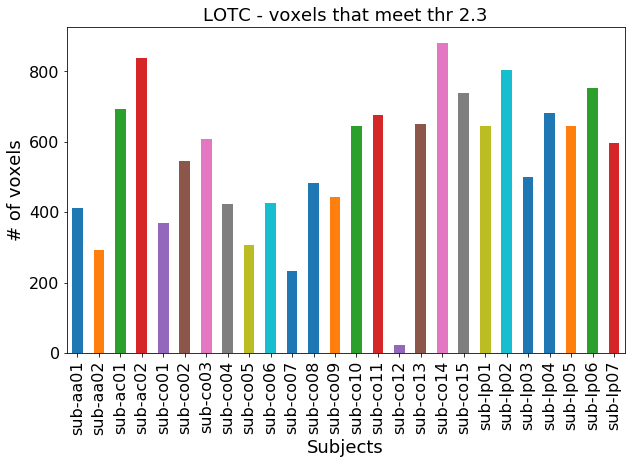

In [158]:
df['LOTC_bi_voxels'].plot.bar(figsize=(10,6),fontsize=16)
plt.ylabel('# of voxels', fontsize=18)
plt.xlabel('Subjects', fontsize=18)
plt.title('LOTC - voxels that meet thr 2.3', fontsize=18)
plt.savefig('/vols/Data/soma/superusers/results/thresh_2.3_masks_plots/LOTC_bi.png', bbox_inches = "tight")